In [12]:
import numpy
import pandas
import seaborn
import sklearn
import sklearn.cluster
import matplotlib.pyplot as plt
seaborn.set_style("whitegrid")

# Application of classical unsupervised approaches to cells clusterization
It this notebook stereo-seq data for mouse midbrain tissue are using to clusterize tissue cells via classical approaches, such as K-means with predefined amount of clusters k=11 and DBSCAN with undefined cluster amount. 

In [13]:
reduced_data = pandas.read_csv("../data/reduced_dimentions_data.csv", index_col=0)

In [14]:
only_expression_data = reduced_data[[str(i) for i in range(20)]]

### K-means clusterization

In [22]:
cells_types_number = 11

In [23]:
kmeans = sklearn.cluster.KMeans(init="k-means++", n_clusters=cells_types_number, n_init=2)
kmeans.fit(only_expression_data)
labels = kmeans.predict(only_expression_data)


In [24]:
clusterized_cells_by_kmeans = reduced_data[["cell_id", "x", "y"]]
clusterized_cells_by_kmeans.insert(loc=3, column="cell_type", value=labels)

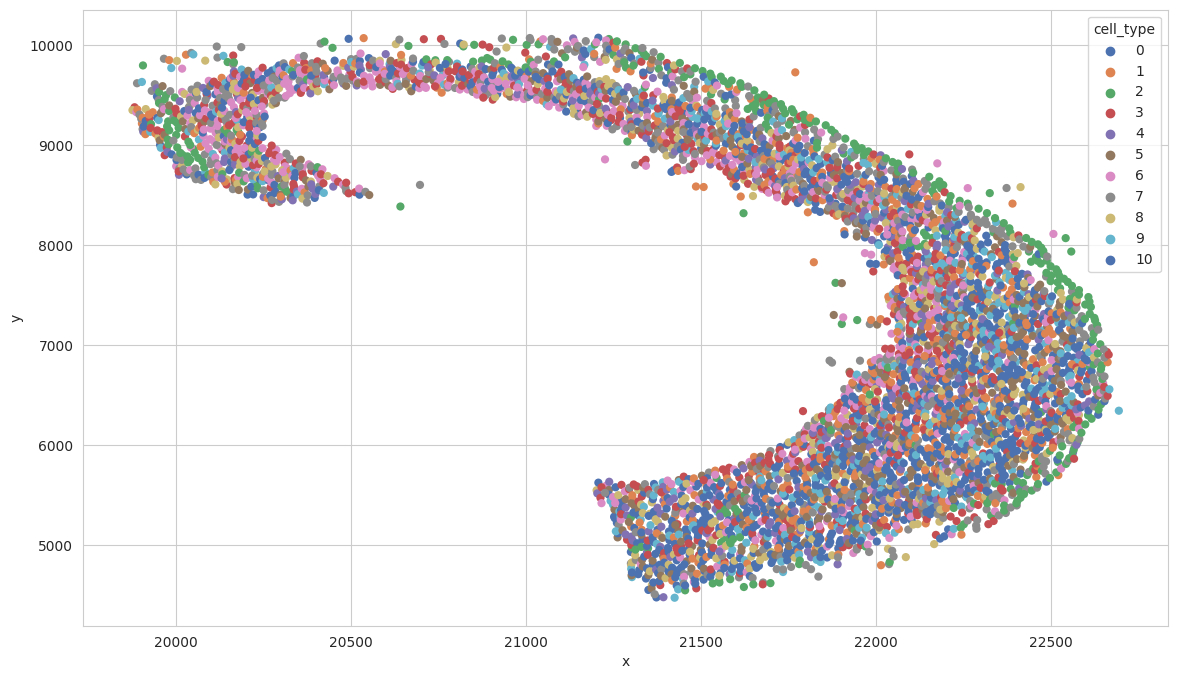

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))
p1 = seaborn.scatterplot(
    clusterized_cells_by_kmeans, 
    x="x", 
    y="y", 
    hue="cell_type", 
    palette="deep",
    s=35,
    linewidth=0,
    ax=ax,
)
ax.set(xlabel="x", ylabel="y")
plt.show()

### DBSCAN clusterization

In [26]:
dbscan = sklearn.cluster.DBSCAN(min_samples=10, eps=.6).fit(only_expression_data)
dbscan_labels = dbscan.labels_

In [27]:
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 58
Estimated number of noise points: 345


In [28]:
clusterized_cells_by_dbscan = reduced_data[["cell_id", "x", "y"]]
clusterized_cells_by_dbscan.insert(loc=3, column="cell_type", value=dbscan_labels)
clusterized_cells_by_dbscan = clusterized_cells_by_dbscan[clusterized_cells_by_dbscan.cell_type != -1]

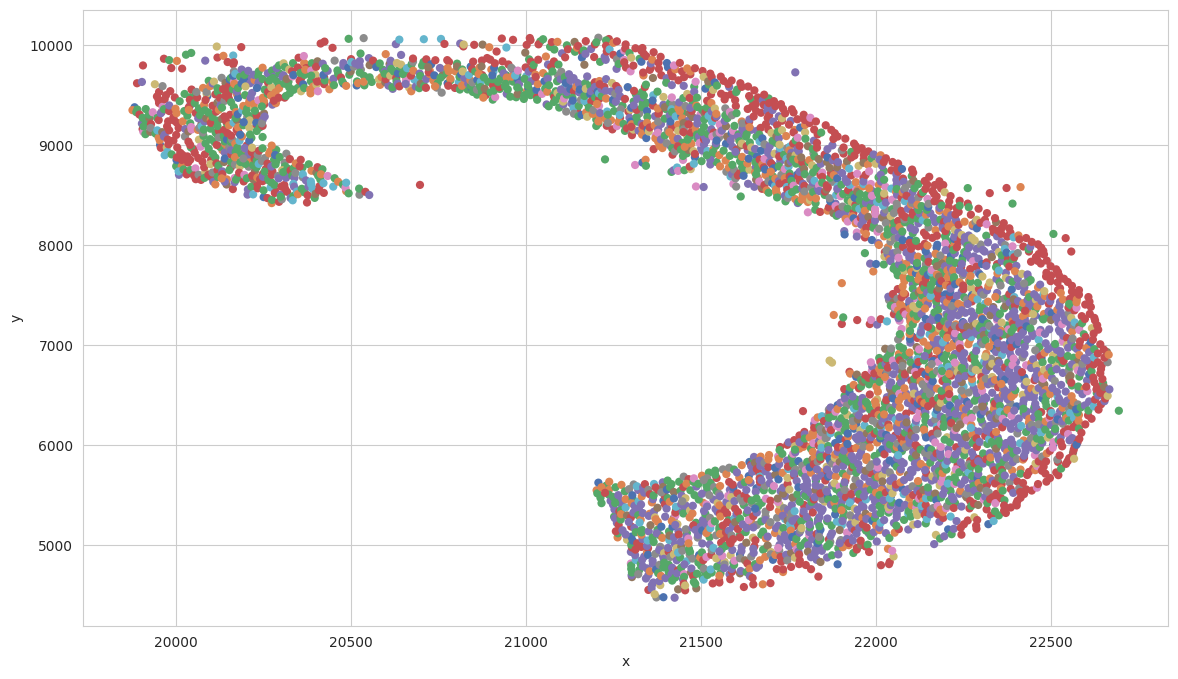

In [29]:
fig, ax = plt.subplots(figsize=(14, 8))
p1 = seaborn.scatterplot(
    clusterized_cells_by_dbscan, 
    x="x", 
    y="y", 
    hue="cell_type", 
    palette="deep",
    s=35,
    linewidth=0,
    legend=False,
    ax=ax,
)
ax.set(xlabel="x", ylabel="y")
plt.show()

### DBSCAN clusterization with additional information about coordinates

In [35]:
data_for_dbscan = reduced_data[["x", "y"] + list(str(i) for i in range(20))]
data_for_dbscan = sklearn.preprocessing.StandardScaler().fit_transform(data_for_dbscan)

In [113]:
dbscan_distwise = sklearn.cluster.DBSCAN(min_samples=17, eps=2.2).fit(data_for_dbscan)
dbscan_distwise_labels = dbscan_distwise.labels_

In [114]:
n_clusters_ = len(set(dbscan_distwise_labels)) - (1 if -1 in dbscan_distwise_labels else 0)
n_noise_ = list(dbscan_distwise_labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 48
Estimated number of noise points: 1197


In [115]:
clusterized_dist_wise_cells_by_dbscan = reduced_data[["cell_id", "x", "y"]]
clusterized_dist_wise_cells_by_dbscan.insert(loc=3, column="cell_type", value=dbscan_distwise_labels)
clusterized_dist_wise_cells_by_dbscan = clusterized_dist_wise_cells_by_dbscan[
    clusterized_dist_wise_cells_by_dbscan.cell_type != -1
]

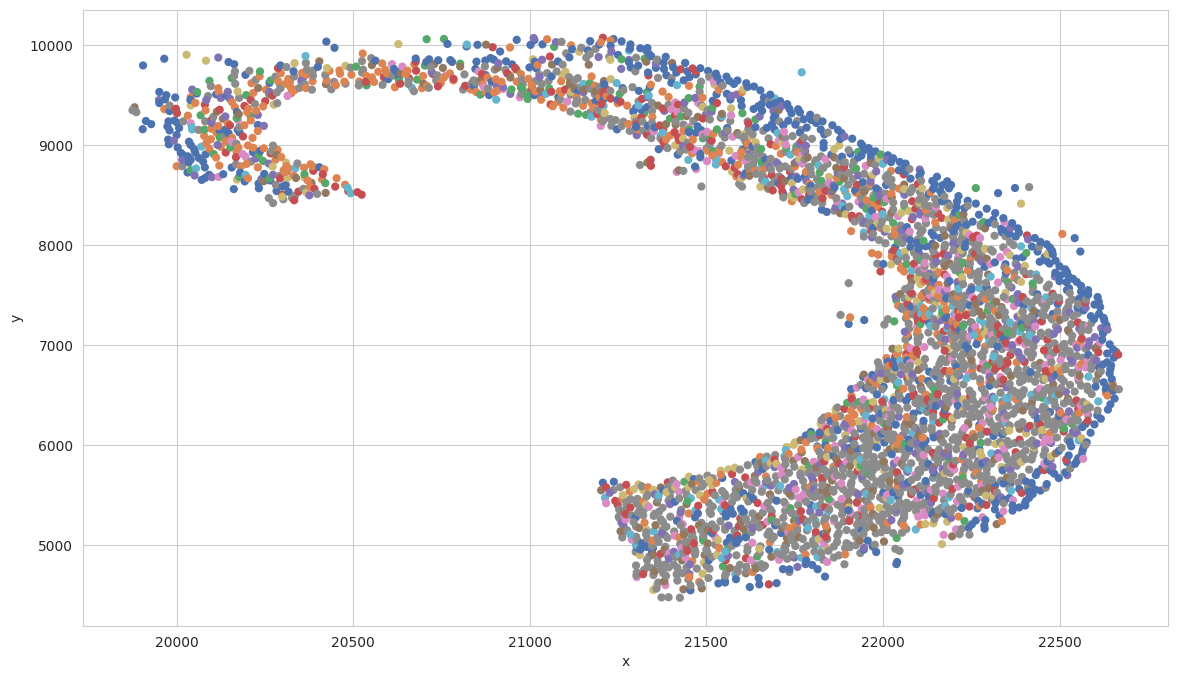

In [116]:
fig, ax = plt.subplots(figsize=(14, 8))
p1 = seaborn.scatterplot(
    clusterized_dist_wise_cells_by_dbscan, 
    x="x", 
    y="y", 
    hue="cell_type", 
    palette="deep",
    s=35,
    linewidth=0,
    legend=False,
    ax=ax,
)
ax.set(xlabel="x", ylabel="y")
plt.show()